In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
df=pd.read_csv('//content//data.csv',encoding='unicode_escape')

In [9]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [10]:
df.shape

(89348, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89348 entries, 0 to 89347
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     56643 non-null  float64
 1   sampling_date                89348 non-null  object 
 2   state                        89348 non-null  object 
 3   location                     89348 non-null  object 
 4   agency                       55111 non-null  object 
 5   type                         87720 non-null  object 
 6   so2                          81871 non-null  float64
 7   no2                          86319 non-null  float64
 8   rspm                         80583 non-null  float64
 9   spm                          46524 non-null  float64
 10  location_monitoring_station  81974 non-null  object 
 11  pm2_5                        1848 non-null   float64
 12  date                         89347 non-null  object 
dtypes: float64(6), o

In [12]:
df.isnull().sum()

stn_code                       32705
sampling_date                      0
state                              0
location                           0
agency                         34237
type                            1628
so2                             7477
no2                             3029
rspm                            8765
spm                            42824
location_monitoring_station     7374
pm2_5                          87500
date                               1
dtype: int64

In [13]:
df.describe()

,stn_code,so2,no2,rspm,spm,pm2_5
count,56643.000000,81871.000000,86319.000000,80583.000000,46524.000000,1848.000000
mean,396.701199,9.121197,23.221897,100.215503,217.466965,34.651136
std,220.244476,8.915667,16.779551,67.012686,138.900792,37.800496
min,21.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,203.000000,4.500000,13.000000,58.000000,132.000000,14.000000
50%,462.000000,6.800000,18.300000,85.000000,191.000000,21.000000
75%,583.000000,11.000000,29.000000,123.000000,274.000000,31.050000
max,788.000000,228.000000,334.900000,892.000000,1885.000000,318.000000


In [14]:
df.nunique()

stn_code                        172
sampling_date                  4969
state                            11
location                         87
agency                           17
type                              8
so2                            1074
no2                            1413
rspm                           1373
spm                            2163
location_monitoring_station     229
pm2_5                           245
date                           4824
dtype: int64

In [15]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

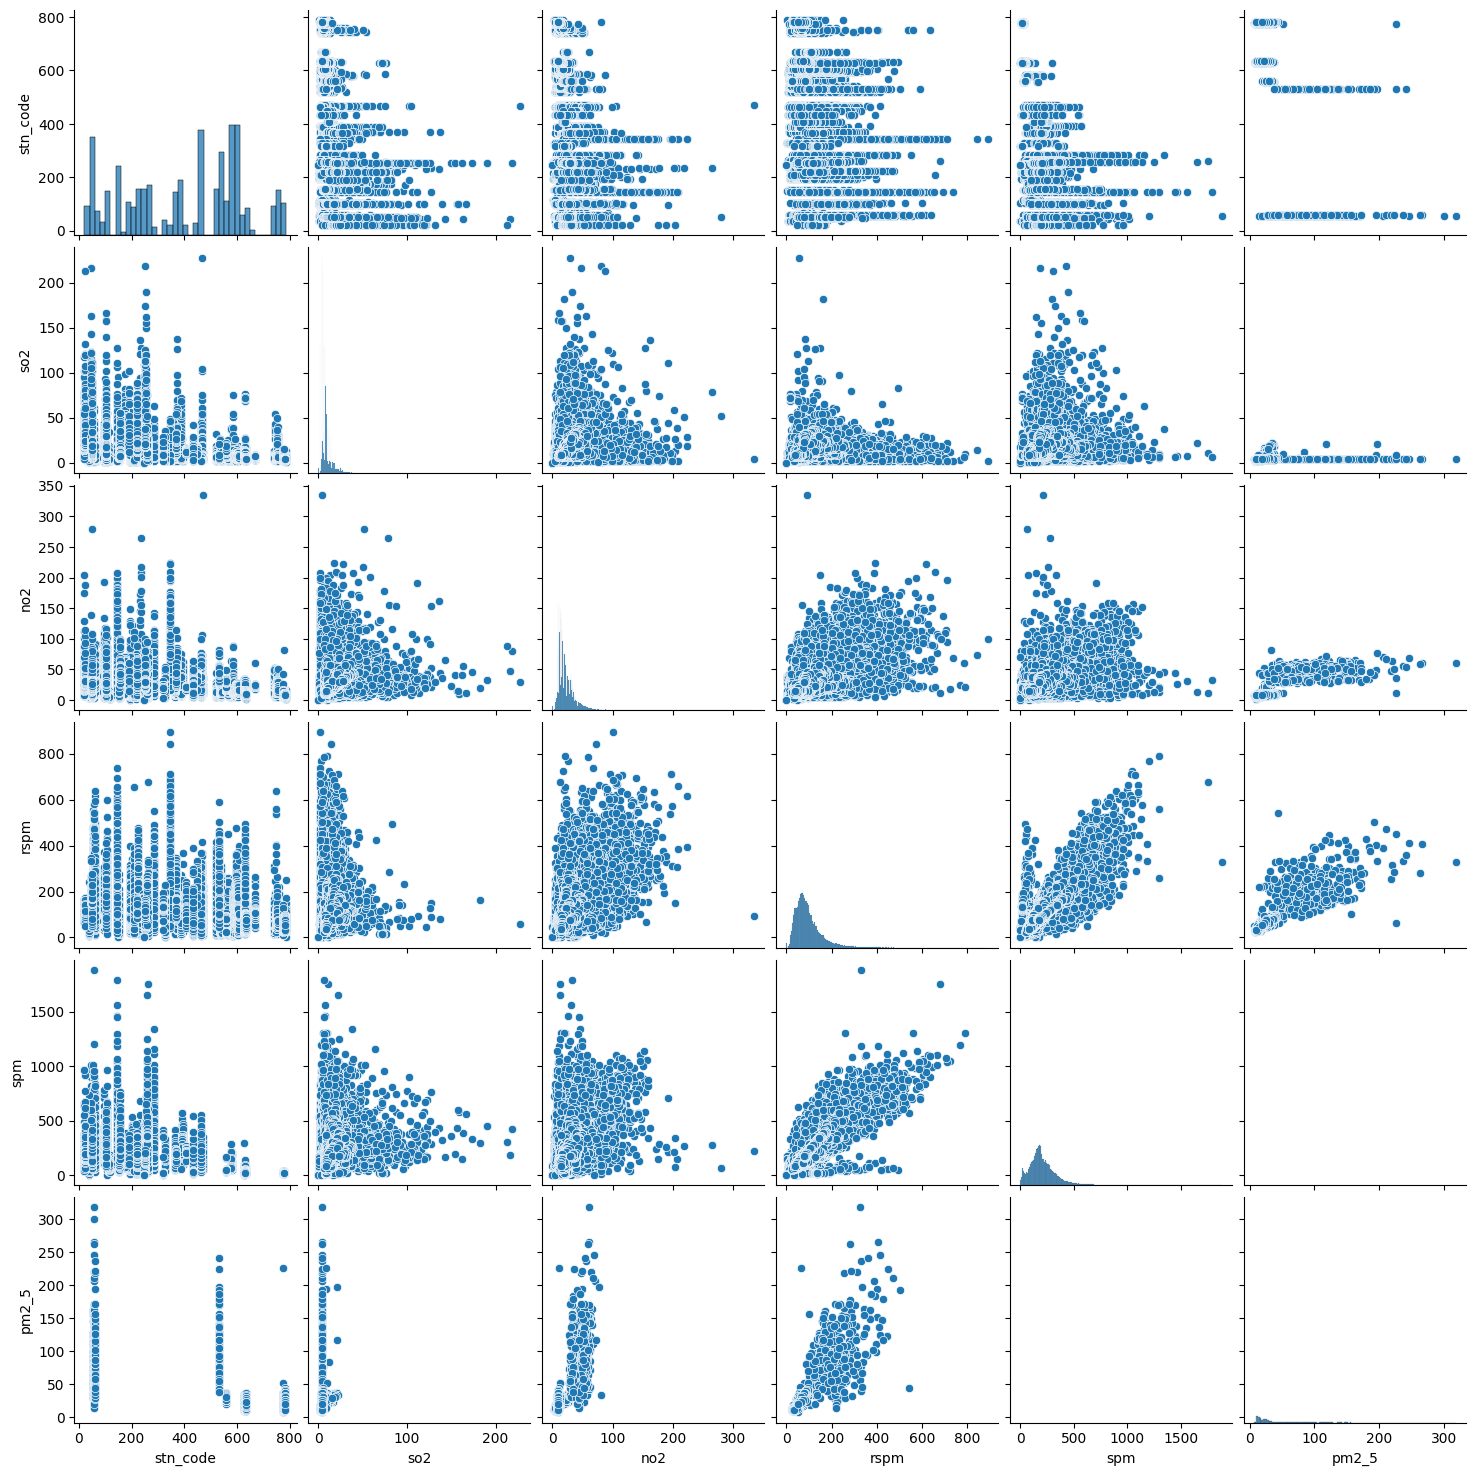

In [16]:
sns.pairplot(data=df)

In [17]:
df['state'].value_counts()

state
Andhra Pradesh          26368
Assam                   19361
Gujarat                  8730
Delhi                    8551
Chandigarh               8520
Chhattisgarh             7831
Goa                      6206
Bihar                    2275
Daman & Diu               782
Dadra & Nagar Haveli      634
Arunachal Pradesh          90
Name: count, dtype: int64

[]

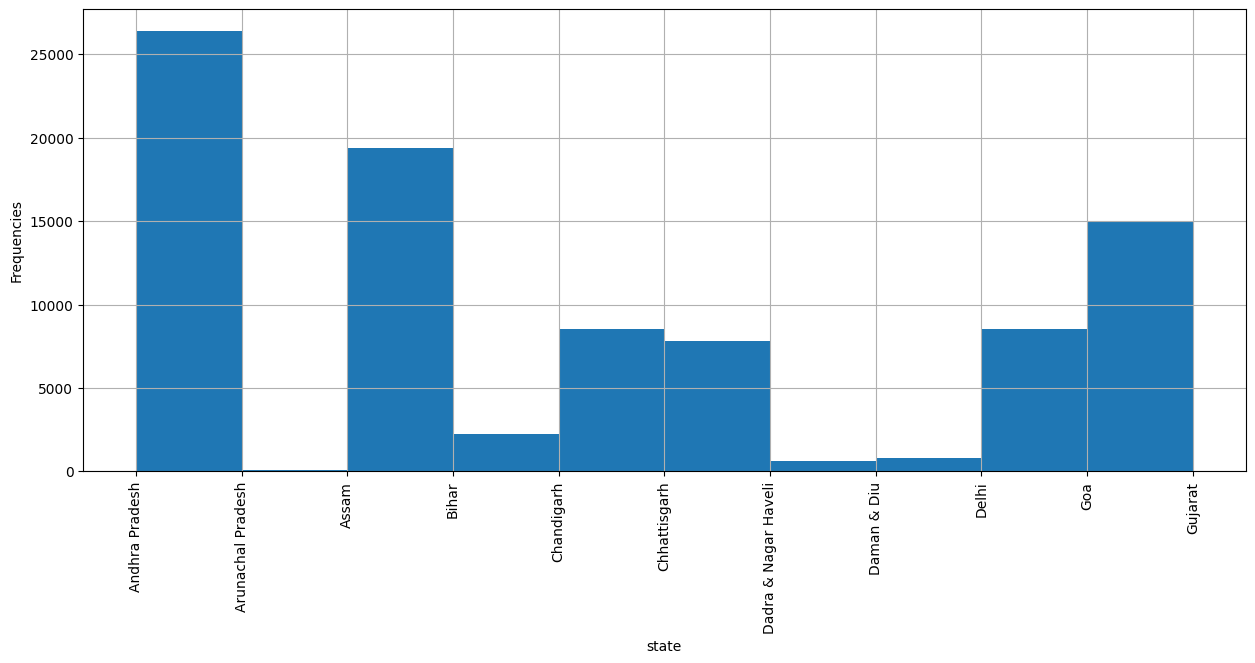

In [18]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()

In [19]:
df['type'].value_counts()

type
Residential, Rural and other Areas    40143
Residential and others                23438
Industrial Area                       12667
Industrial Areas                       7985
Sensitive Area                         2083
Sensitive Areas                        1282
Industrial                               64
Residential                              58
Name: count, dtype: int64

[]

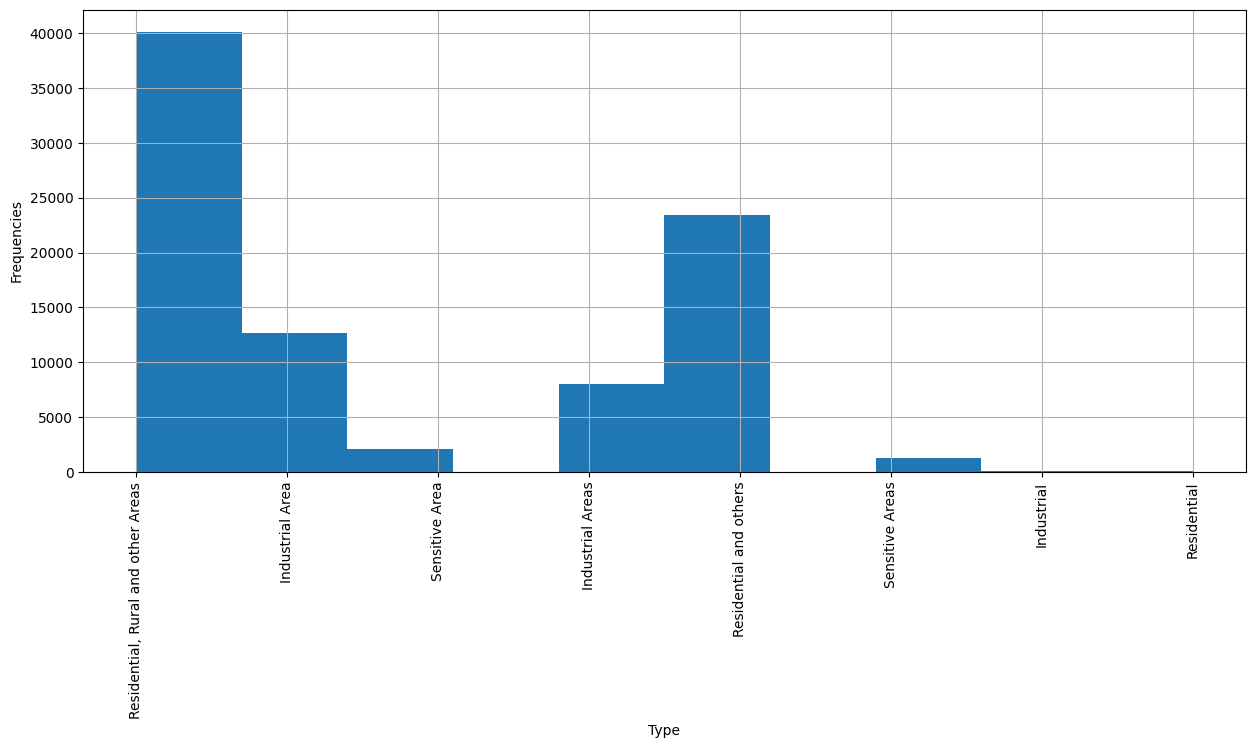

In [20]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

In [21]:
df['agency'].value_counts()

agency
Andhra Pradesh State Pollution Control Board                   15691
Assam State Pollution Control Board                            13427
Goa State Pollution Control Board                               5040
Chandigarh Pollution Control Committee                          4614
Chattisgarh Environment Conservation Board                      4051
Central Pollution Control Board                                 3604
National Environmental Engineering Research Institute           1973
Gujarat Pollution Control Board                                 1894
Gujarat State Pollution Control Board                           1449
Bihar Sate Pollution Control Board                               728
Bihar Pollution Control Board                                    686
Daman Diu, Dadra & Nagar Heveli Pollution Control Committee      636
Andhra Pradesh  Pollution Control Board                          610
ASPB                                                             245
Goa Pollution Control Board

[]

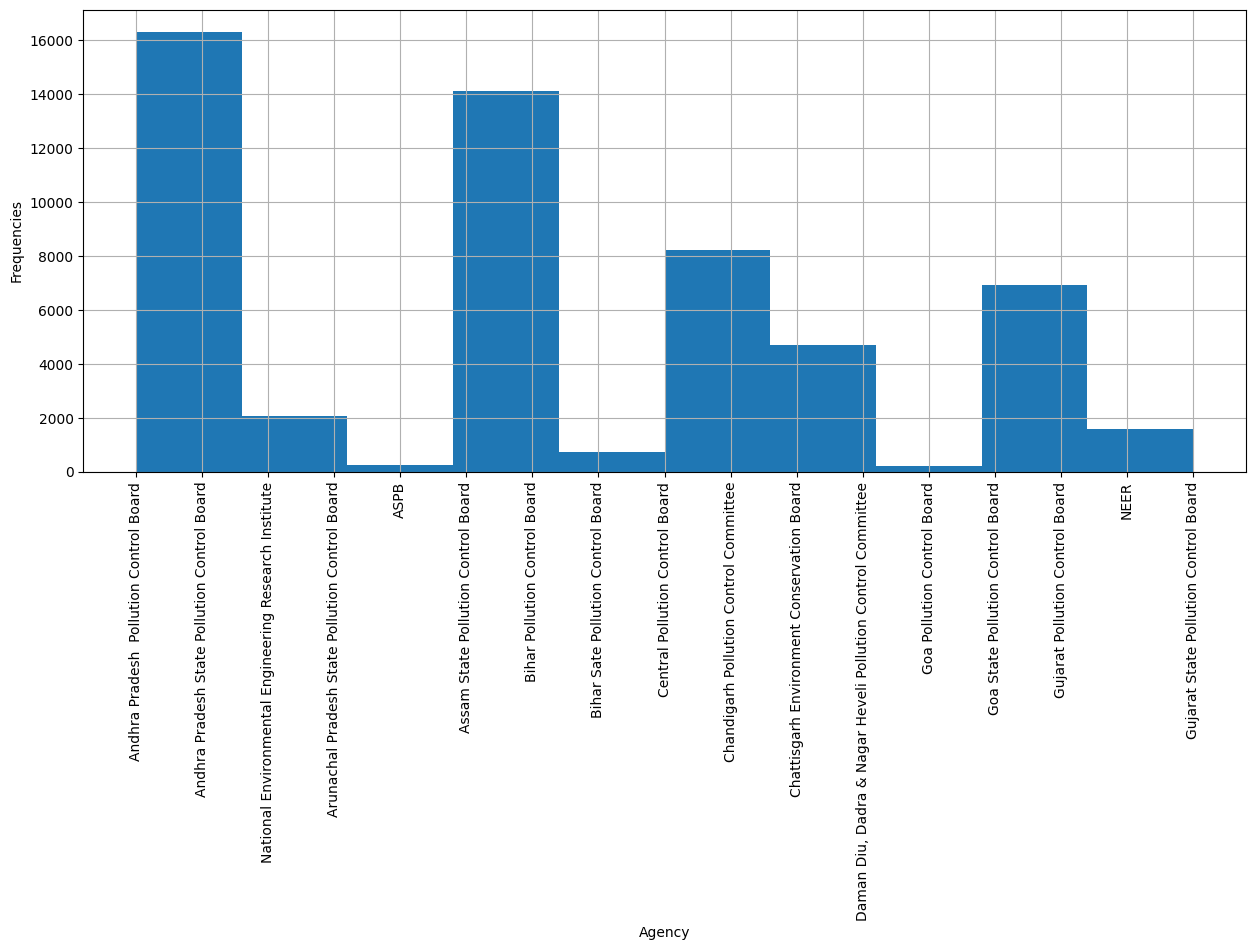

In [22]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()

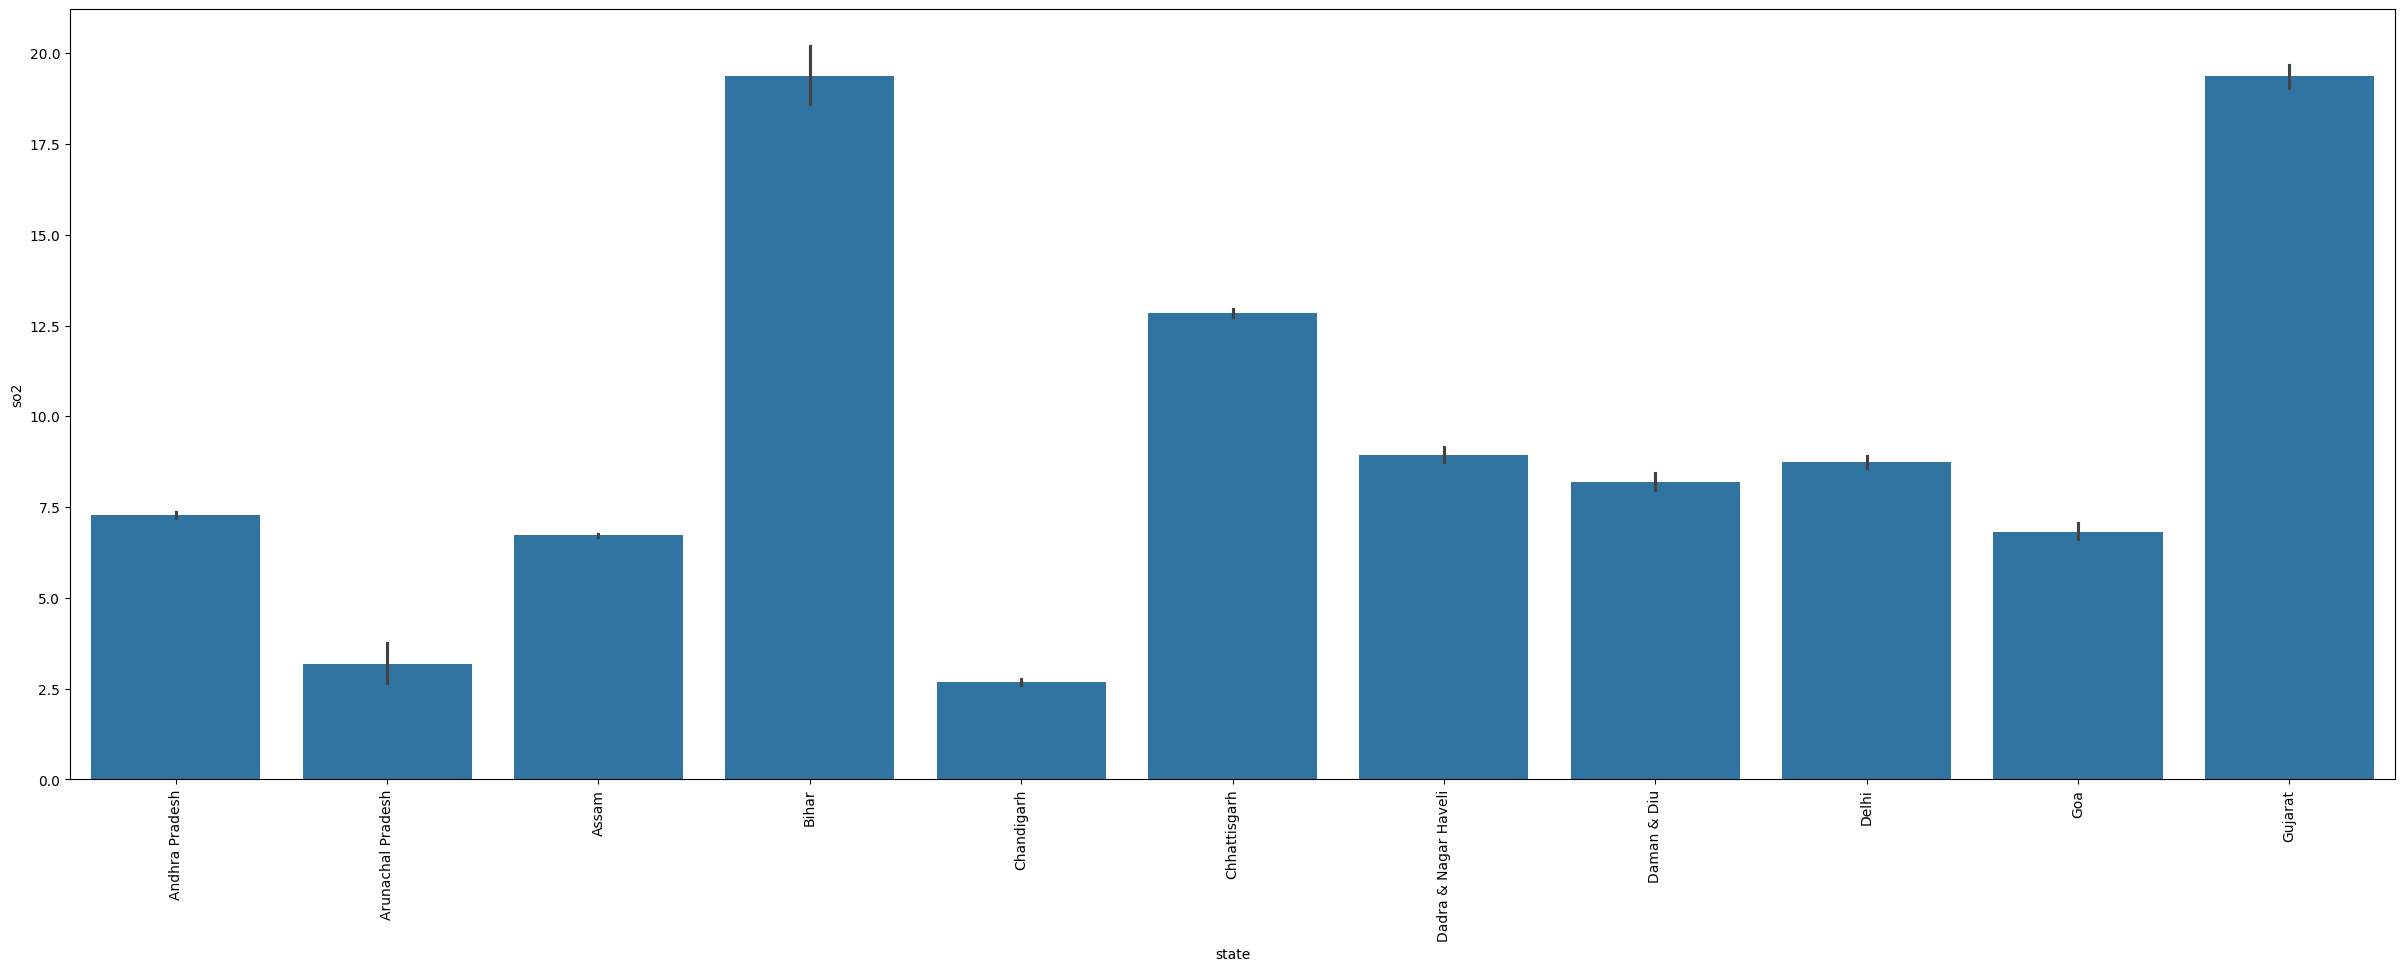

In [23]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);

In [24]:
plt.rcParams['figure.figsize']=(30,10)

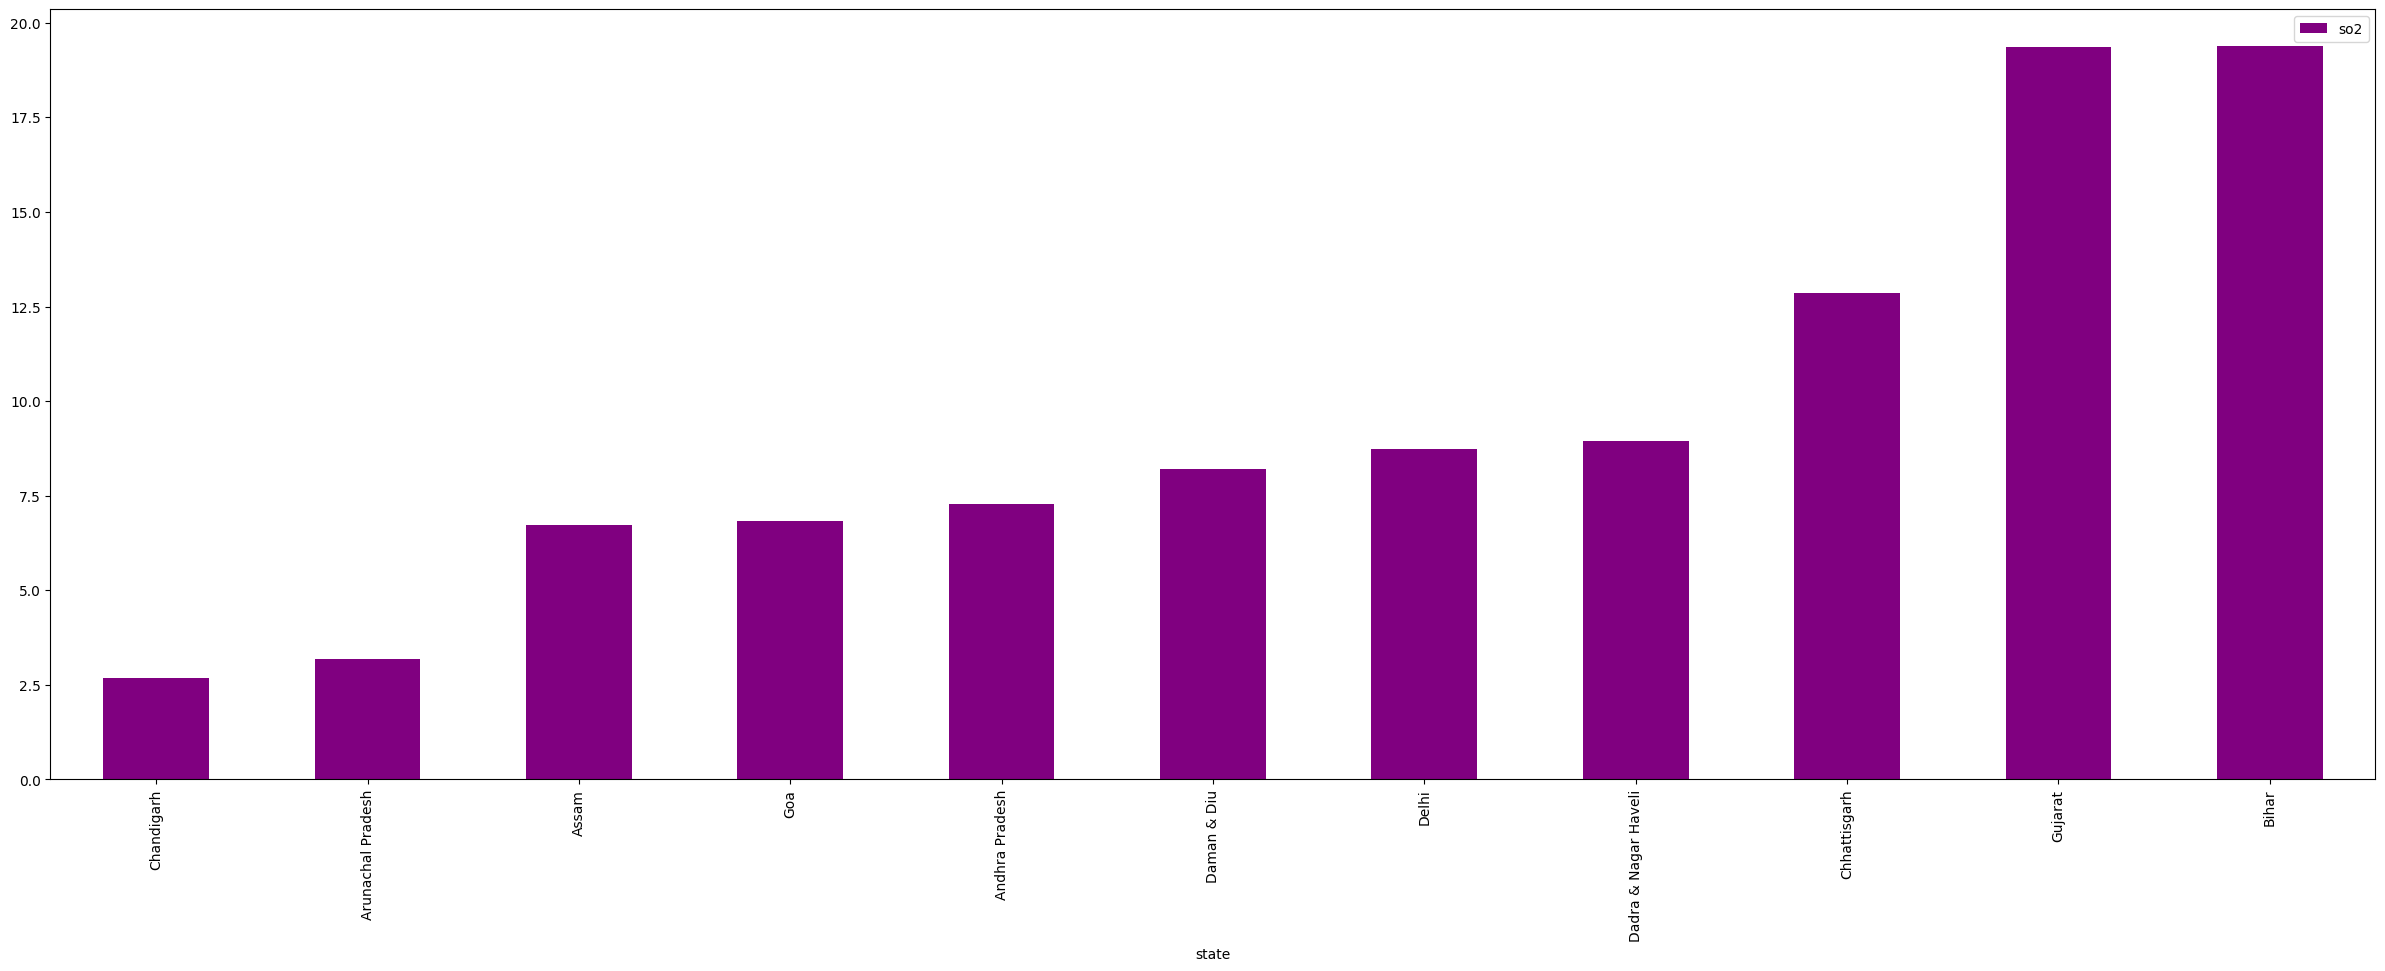

In [25]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

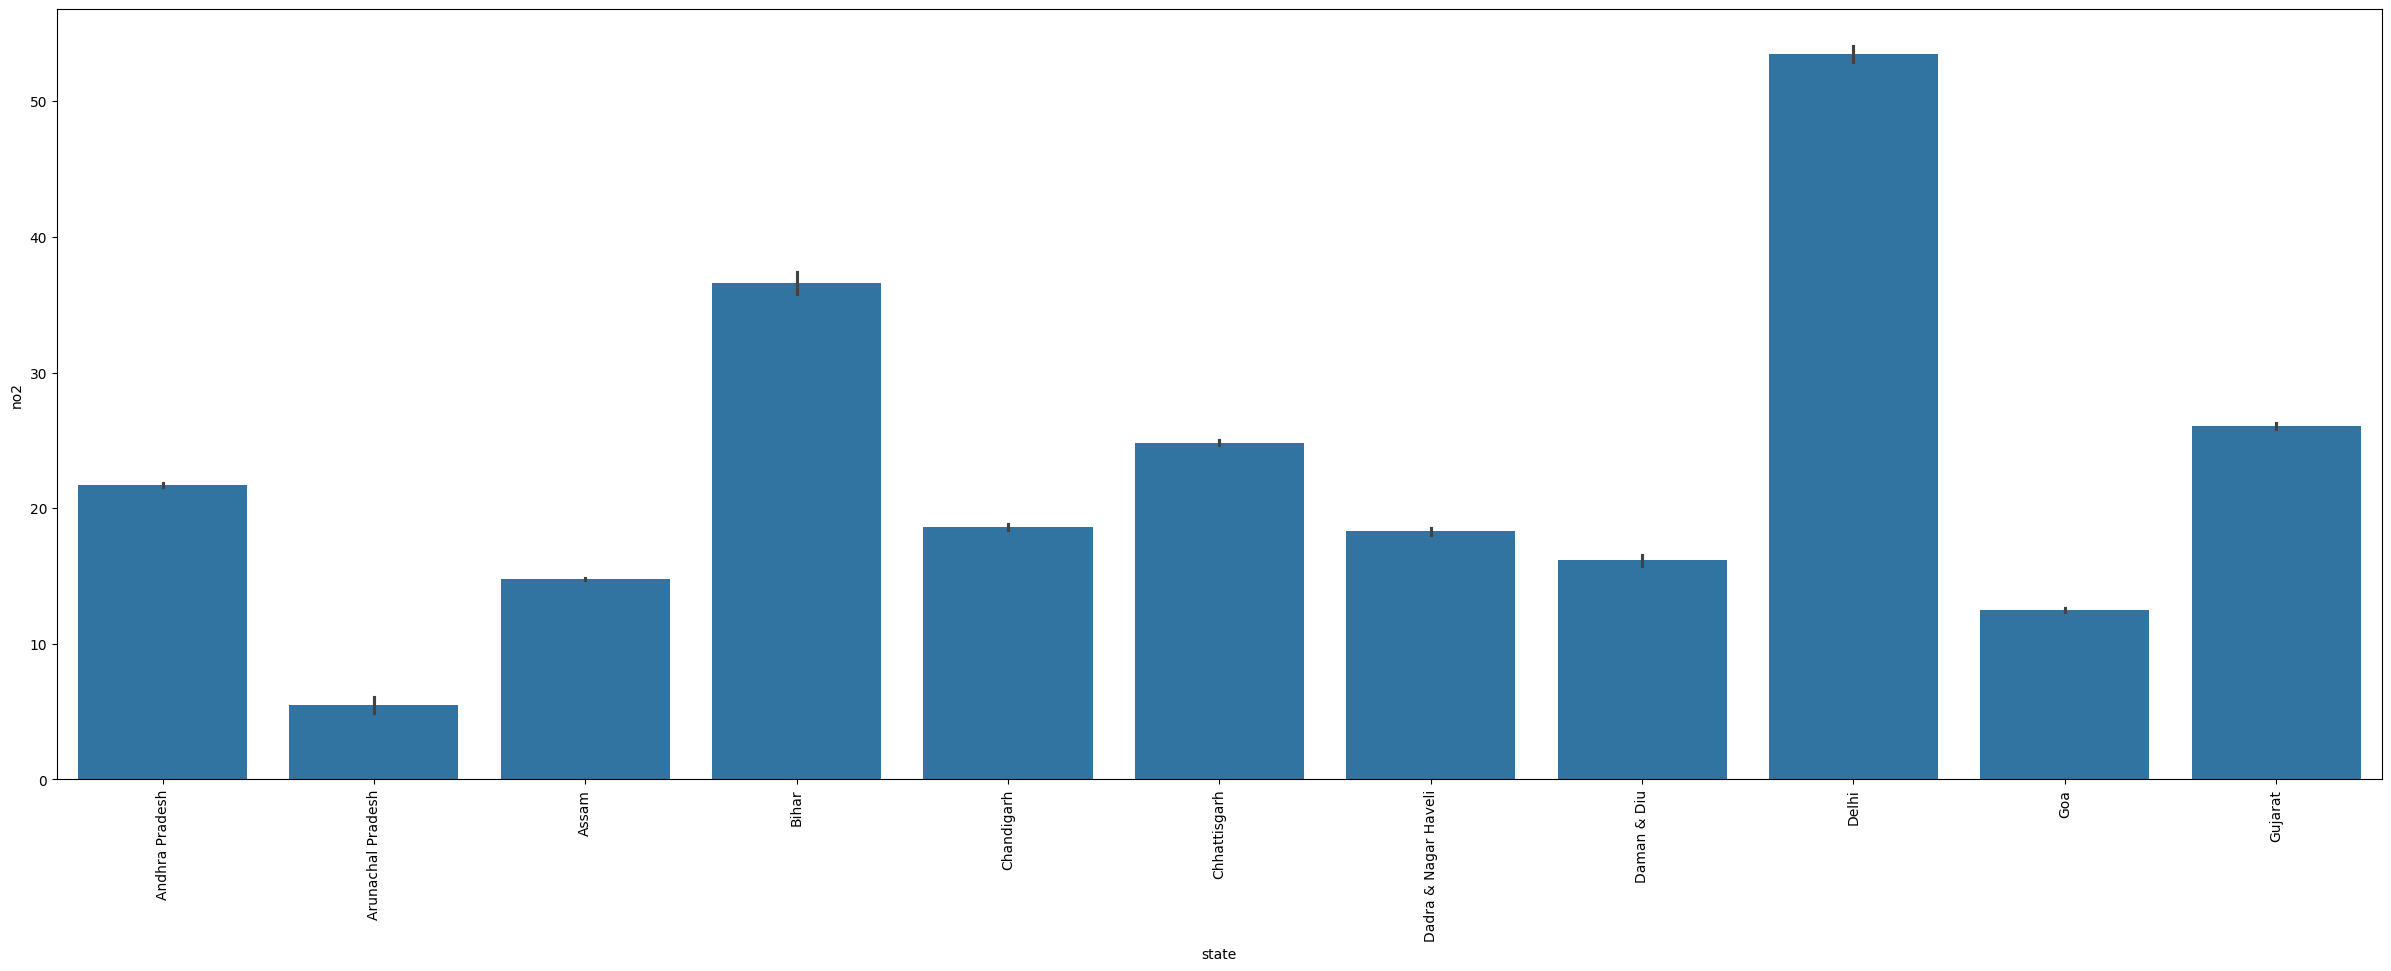

In [26]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);

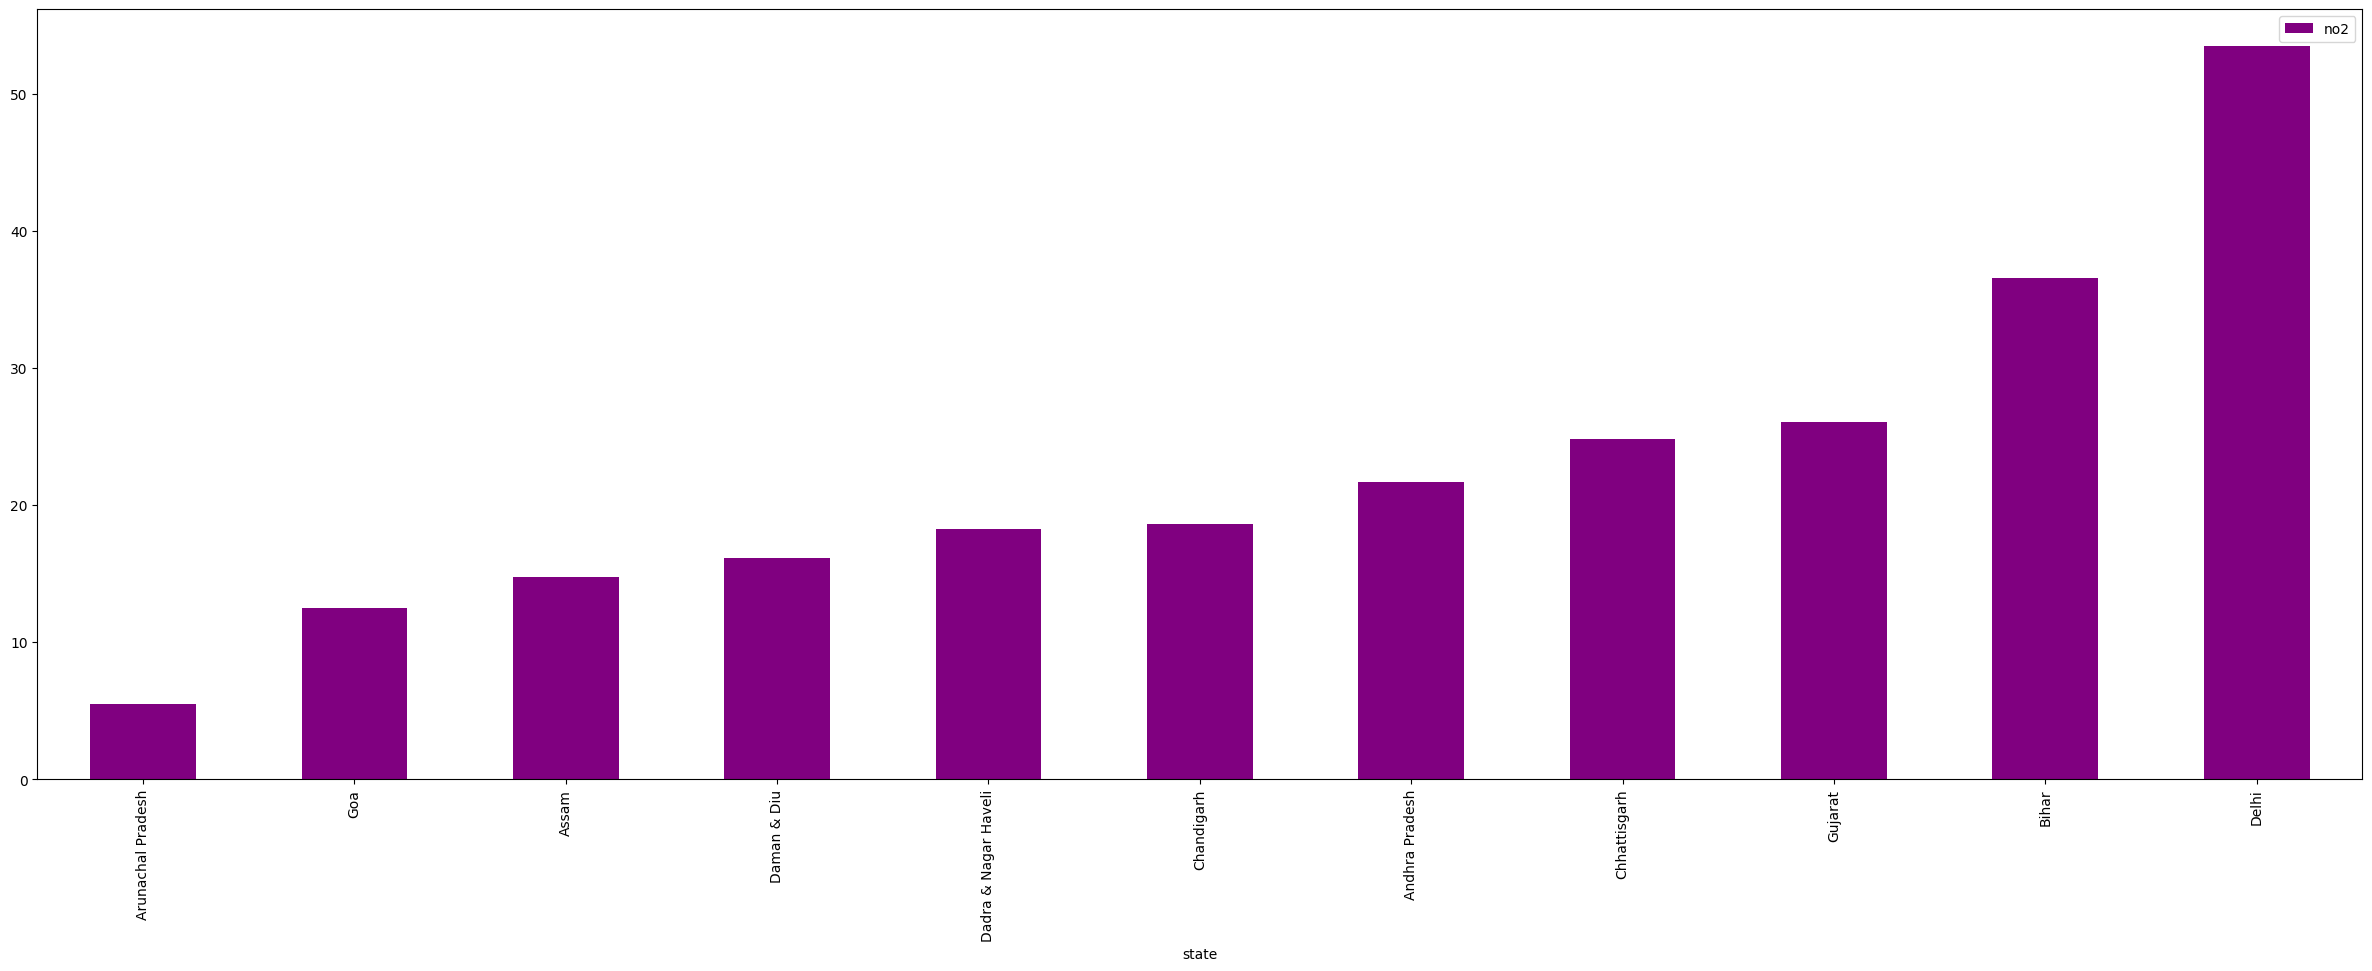

In [27]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()

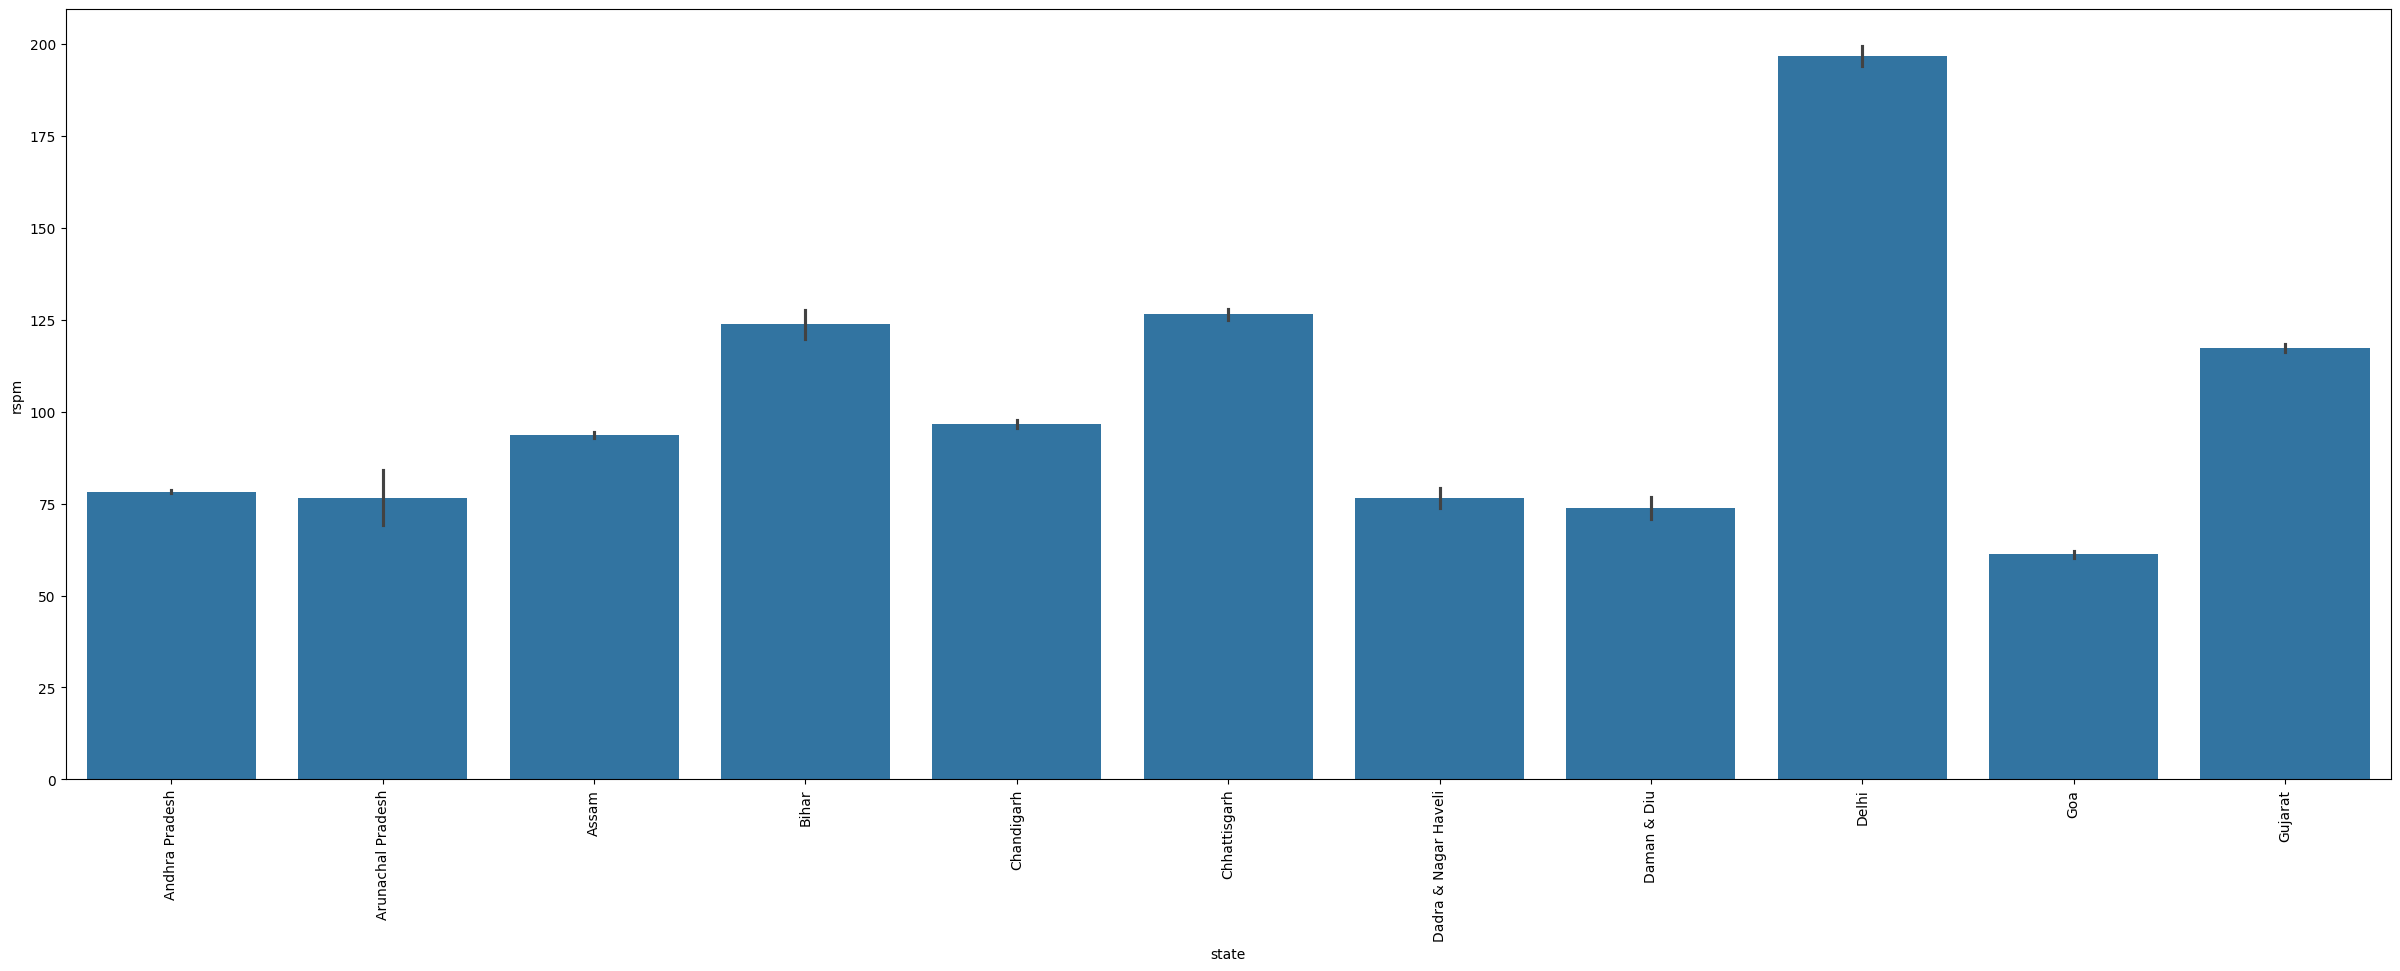

In [28]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);

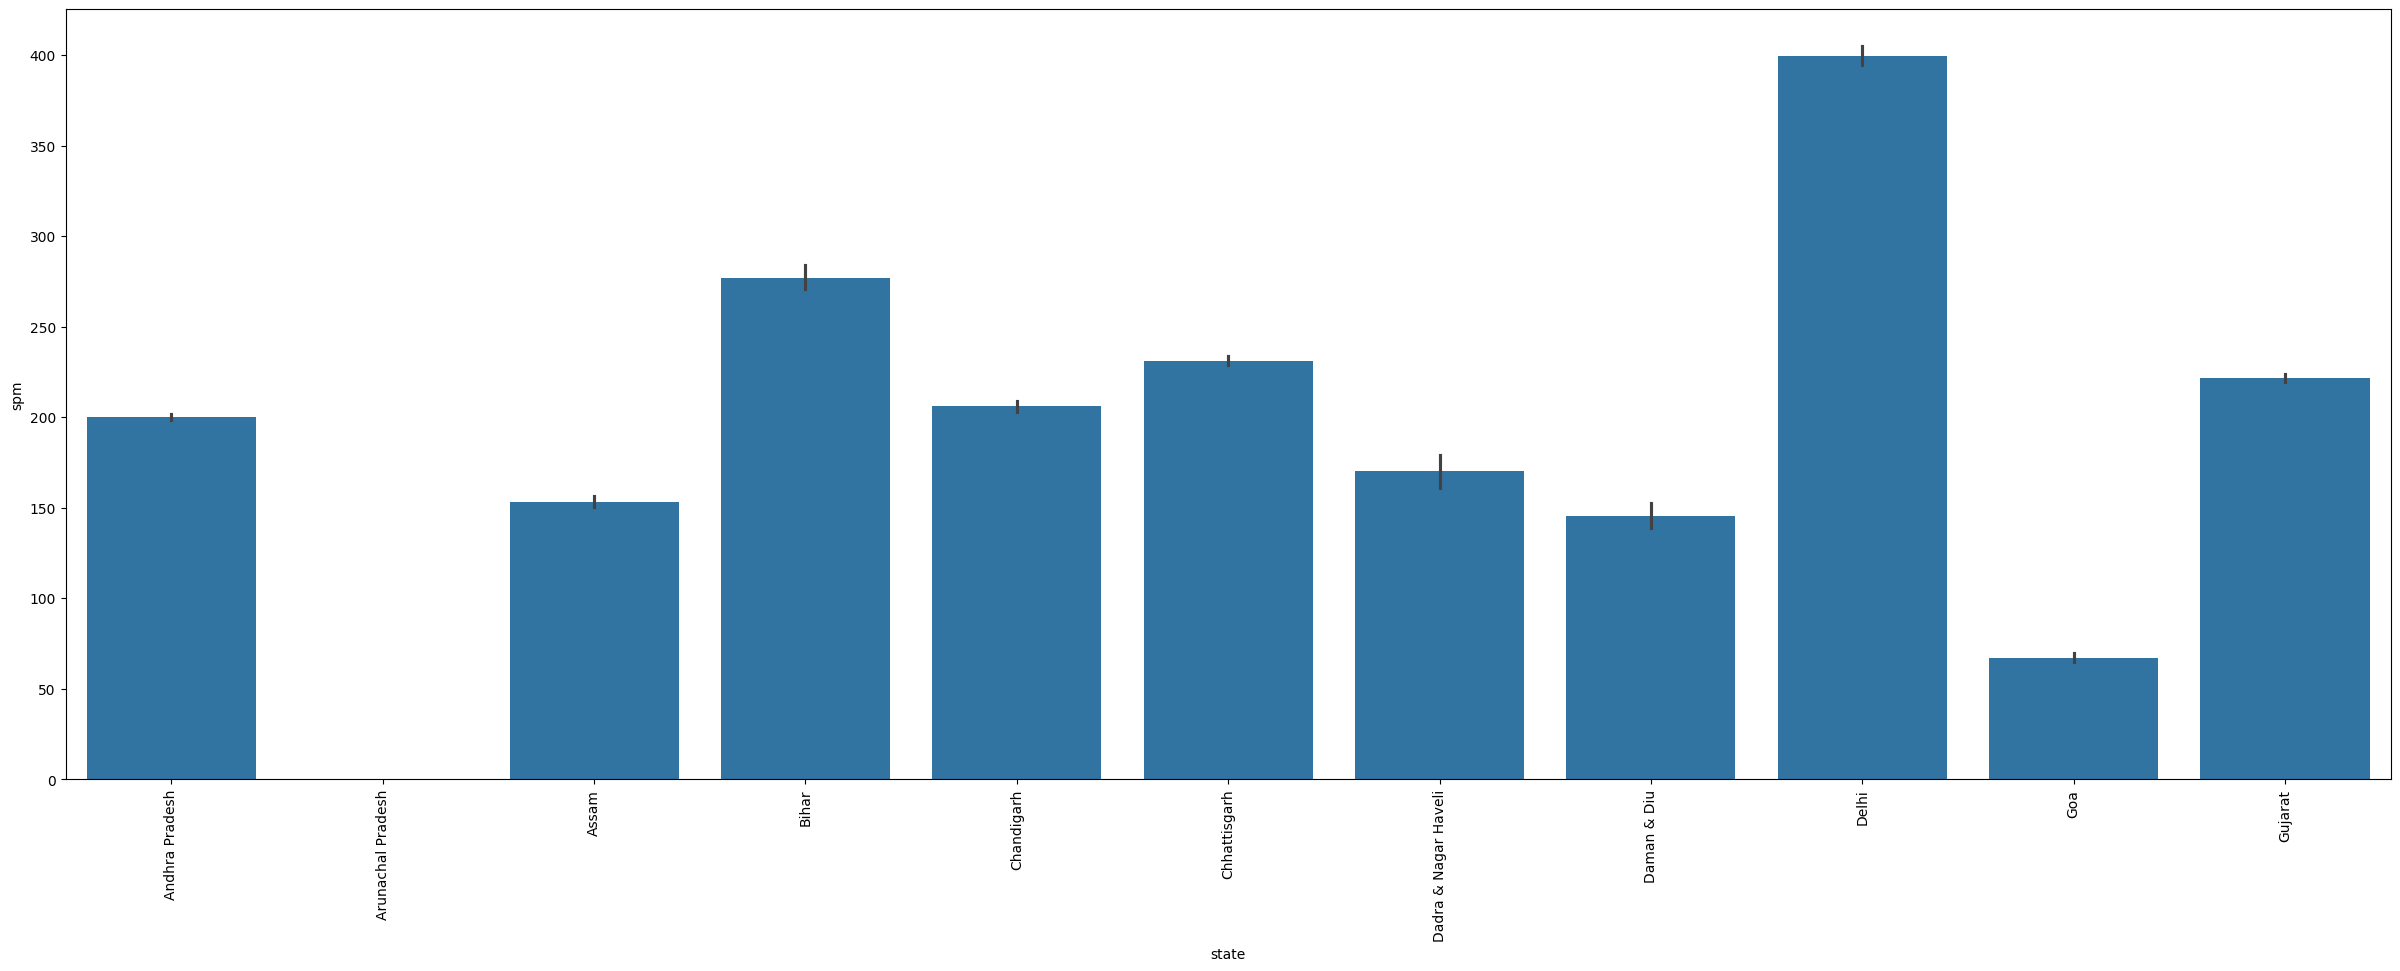

In [29]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);

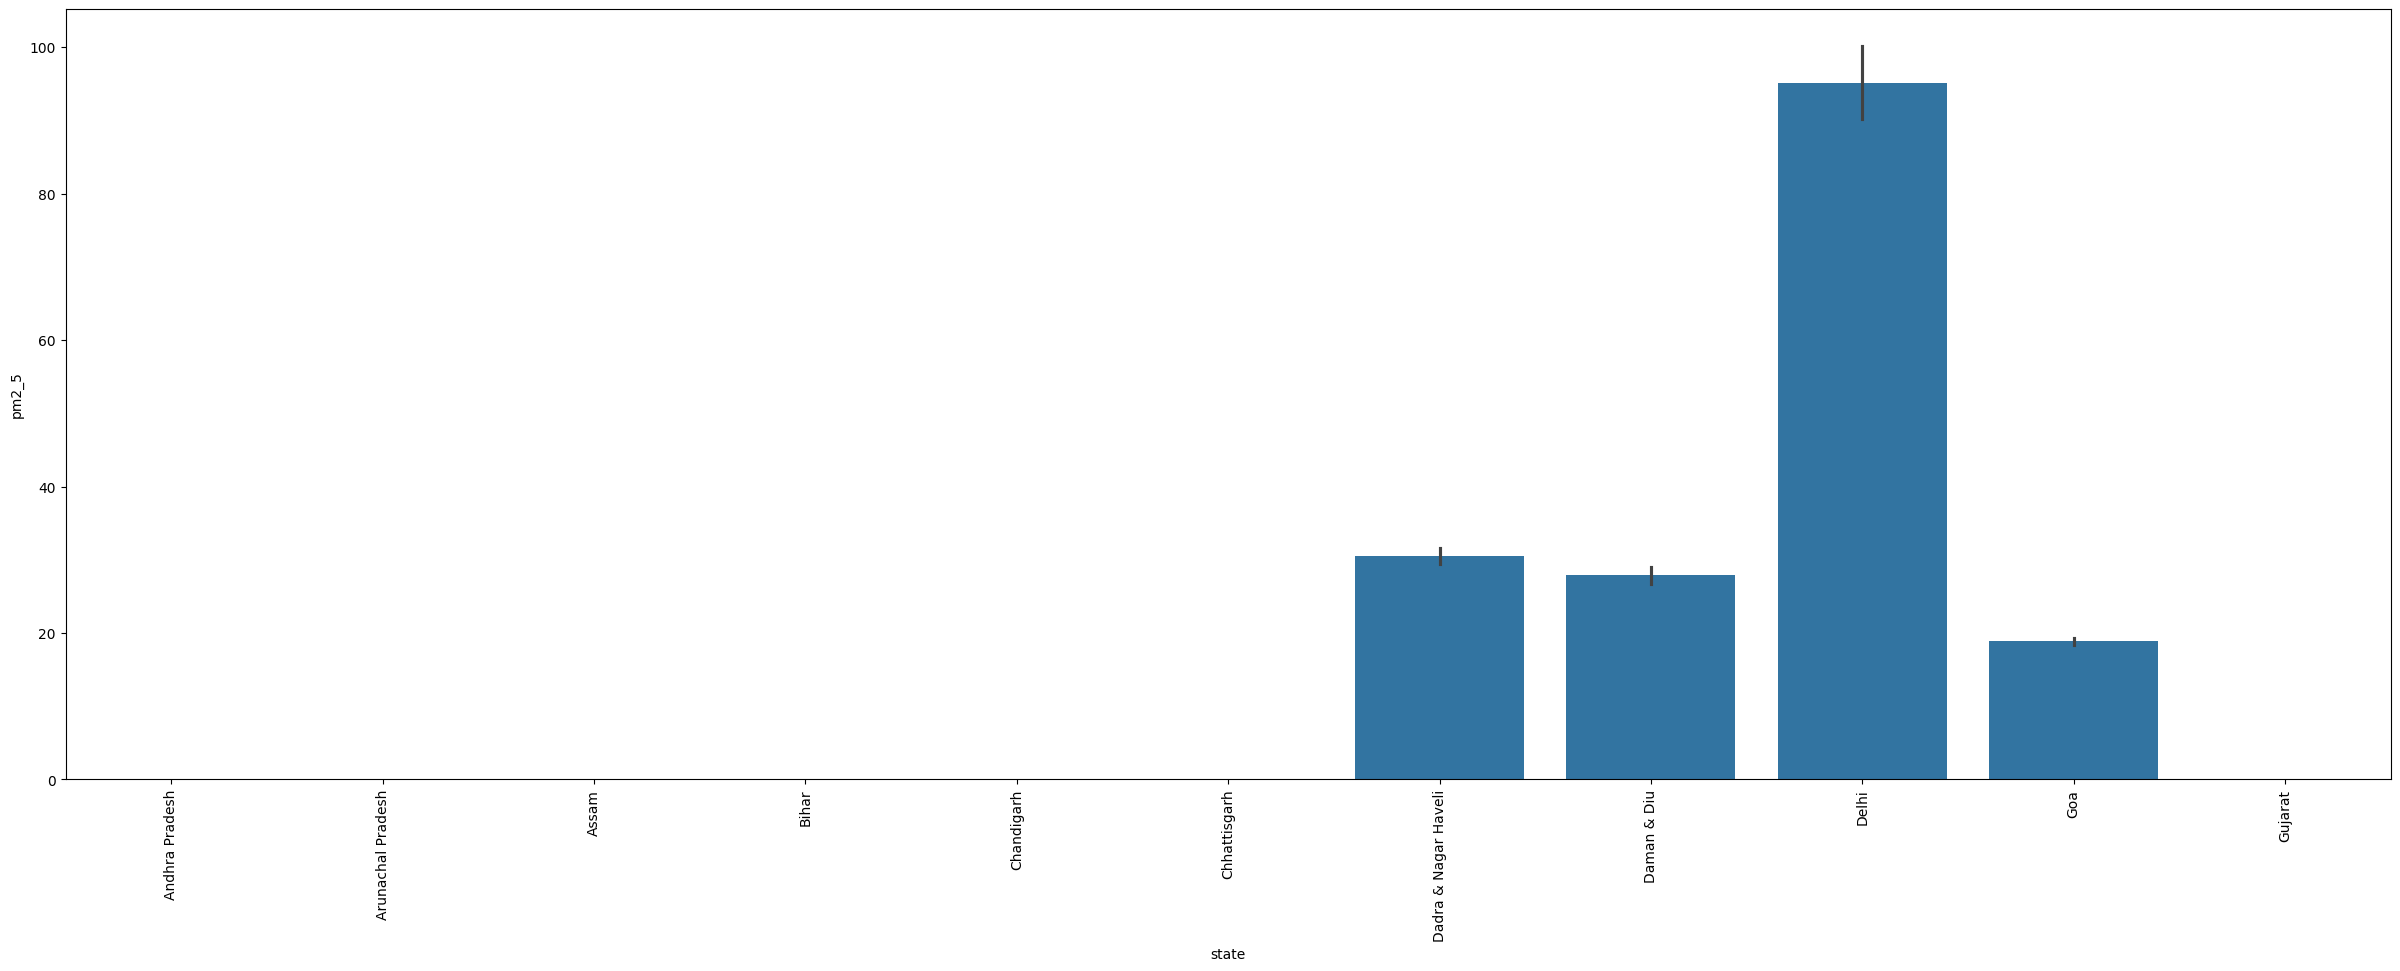

In [30]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);

In [31]:
nullvalues = df.isnull().sum().sort_values(ascending=False)

In [32]:
nullvalues

pm2_5                          87500
spm                            42824
agency                         34237
stn_code                       32705
rspm                            8765
so2                             7477
location_monitoring_station     7374
no2                             3029
type                            1628
date                               1
sampling_date                      0
state                              0
location                           0
dtype: int64

In [33]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [34]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])

In [35]:
missing_data_with_percentage

,Total,Percent
pm2_5,87500,97.931683
spm,42824,47.929444
agency,34237,38.318709
stn_code,32705,36.604065
rspm,8765,9.809957
so2,7477,8.368402
location_monitoring_station,7374,8.253123
no2,3029,3.390115
type,1628,1.822089
date,1,0.001119


In [36]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [37]:
df.isnull().sum()

state           0
location        0
type         1628
so2          7477
no2          3029
rspm         8765
spm         42824
pm2_5       87500
dtype: int64

In [38]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
89343,Gujarat,Vapi,Industrial Areas,27.2,35.1,79.0,173.0,NaN
89344,Gujarat,Vapi,Industrial Areas,25.6,33.8,85.0,189.0,NaN
89345,Gujarat,Vapi,Industrial Areas,24.2,31.2,82.0,177.0,NaN
89346,Gujarat,Vapi,Industrial Areas,22.8,30.0,78.0,172.0,NaN


In [39]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [40]:
df.fillna(0, inplace=True)

In [41]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [42]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
89343,Gujarat,Vapi,Industrial Areas,27.2,35.1,79.0,173.0,0.0
89344,Gujarat,Vapi,Industrial Areas,25.6,33.8,85.0,189.0,0.0
89345,Gujarat,Vapi,Industrial Areas,24.2,31.2,82.0,177.0,0.0
89346,Gujarat,Vapi,Industrial Areas,22.8,30.0,78.0,172.0,0.0


In [43]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [44]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [45]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [46]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [47]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [48]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [49]:
df['AQI_Range'].value_counts()

AQI_Range
Good              42341
Poor              25577
Unhealthy          8435
Moderate           7047
Hazardous          3112
Very unhealthy     2836
Name: count, dtype: int64

In [50]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [51]:
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(71478, 4) (17870, 4) (71478,) (17870,)


In [53]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [54]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [55]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  10.747202359975791
RMSE TestData =  10.775397746300555
--------------------------------------------------
RSquared value on train: 0.9901793774920307
RSquared value on test: 0.9902803416889561


In [56]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [57]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [58]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  8.201707240196556e-14
RMSE TestData =  1.1521460928554532
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9998888781455179


In [59]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [61]:
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)

In [62]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.36217476523149716
RMSE TestData =  1.121980555162692
--------------------------------------------------
RSquared value on train: 0.9999888471839405
RSquared value on test: 0.9998946207657404


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [64]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']

In [65]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)

In [66]:
log_reg = LogisticRegression().fit(X_train2, Y_train2)
train_preds2 = log_reg.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))
test_preds2 = log_reg.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.7090356313582681
Model accuracy on test is:  0.7142614888926573
--------------------------------------------------
KappaScore is:  0.5590829194161115


In [67]:
log_reg.predict([[727,327.55,78.2,100]])

array(['Good'], dtype=object)

In [68]:
log_reg.predict([[2.7,45,35.16,23]])

array(['Poor'], dtype=object)

In [69]:
log_reg.predict([[10,2.8,82,20]])

array(['Good'], dtype=object)

In [70]:
log_reg.predict([[2,45.8,37,32]])

array(['Poor'], dtype=object)

In [71]:
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)
train_preds3 = DT2.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))
test_preds3 = DT2.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9996608444972019
--------------------------------------------------
KappaScore is:  0.9994968887908258


In [73]:
RF=RandomForestClassifier().fit(X_train2,Y_train2)

train_preds4 = RF.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))
test_preds4 = RF.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9997625911480413
--------------------------------------------------
KappaScore is:  0.9996478364016859


In [74]:
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
train_preds5 = KNN.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))
test_preds5 = KNN.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9978951940263602
Model accuracy on test is:  0.9965066983211802
--------------------------------------------------
KappaScore is:  0.99481536556053


In [75]:
KNN.predict([[7.4,47.7,78.182,100]])

array(['Poor'], dtype=object)

In [76]:
KNN.predict([[1,1.2,3.12,0]])

array(['Good'], dtype=object)

In [77]:
KNN.predict([[325.7,345,798.182,203]])

array(['Unhealthy'], dtype=object)